# **Modelling and Evaluating**

## Objectives

To answer business requirement 2:

* The client is interested in predicting if a cherry leaf is healthy or contains a posdery mildew.

## Inputs

* inputs/cherry-leaves/cherry-leaves/test
* inputs/cherry-leaves/cherry-leaves/train
* inputs/cherry-leaves/cherry-leaves/validation
* image shape embeddings created in DataVisualisation jupyter notebook

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

---

## Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

2025-08-13 16:33:16.649669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/Users/lukenicklin/mildew-detection-in-cherry-leaves')
print("You set a new current working directory")

You set a new current working directory


In [4]:
work_dir = os.getcwd()
work_dir

'/Users/lukenicklin/mildew-detection-in-cherry-leaves'

---

## Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry-leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already avialable. Please create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already avialable. Please create a new version.


## Set label names

In [7]:
# Set label names
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Images distribution

In [9]:
import pandas as pd
import os

# Create an empty list to store the data
my_data_dir = '/Users/lukenicklin/mildew-detection-in-cherry-leaves/inputs/cherry-leaves/cherry-leaves'
labels = ['powdery_mildew', 'healthy']

data_list = []

for folder in ['test', 'train', 'validation']:
    for label in labels:
        row_data = {
            'Set': folder,
            'Label': label,
            'Count': int(len(os.listdir(os.path.join(my_data_dir, folder, label))))
        }
        data_list.append(row_data)

        print(f"* {folder} - {label}: {row_data['Count']} images")

# Create the DataFrame from the list of dictionaries
df_freq = pd.DataFrame(data_list)

print("\n")
print(df_freq)

* test - powdery_mildew: 317 images
* test - healthy: 317 images
* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 315 images
* validation - healthy: 315 images


          Set           Label  Count
0        test  powdery_mildew    317
1        test         healthy    317
2       train  powdery_mildew   1472
3       train         healthy   1472
4  validation  powdery_mildew    315
5  validation         healthy    315


## Label distribution - bar chart

In [10]:
import plotly.express as px
import pandas as pd
import os

# Create a bar chart using Plotly Express
fig = px.bar(df_freq,
             x="Set",
             y="Count",
             color="Label",
             title="Cherry Leaves Dataset",
             text_auto=True)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_font_size=20,
    barmode='group'
    )
fig.show()
fig.write_image(f'{file_path}/label_distribution_bar.png')

## Set distribution - pie chart

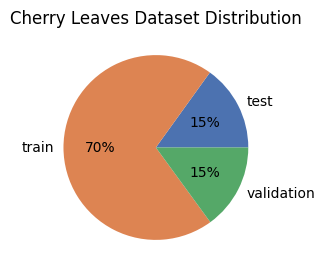

In [13]:
folders = os.listdir(my_data_dir)
data=[]
for folder in folders:
    for label in labels:
        n=int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))
        n+=n
    data.append(n)

px = 1/plt.rcParams['figure.dpi']
plt.subplots(figsize=(800*px, 300*px))
colors = sns.color_palette("deep")[0:5]
plt.pie(data, labels = folders, colors = colors, autopct='%.0f%%')
plt.title('Cherry Leaves Dataset Distribution')
plt.savefig(f'{file_path}/set_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Image data augmentation

## Import ImageDataGenerator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

## Set batch size

In [16]:
batch_size = 20

# Augment training image dataset

In [17]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

Found 2944 images belonging to 2 classes.


## Augment validation image dataset

In [18]:
validation_set = augmented_image_data.flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

Found 630 images belonging to 2 classes.


## Augment test image dataset

In [19]:
test_set = augmented_image_data.flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

Found 634 images belonging to 2 classes.


## Plot augmented training image set

(20, 256, 256, 3)


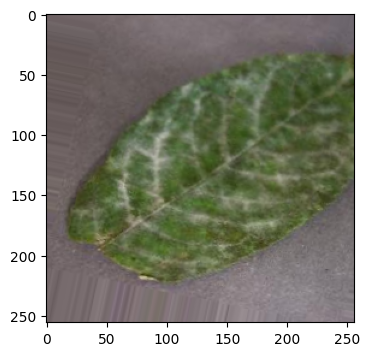

(20, 256, 256, 3)


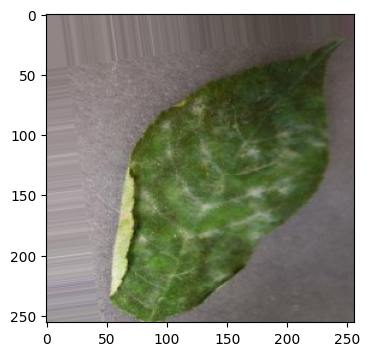

(20, 256, 256, 3)


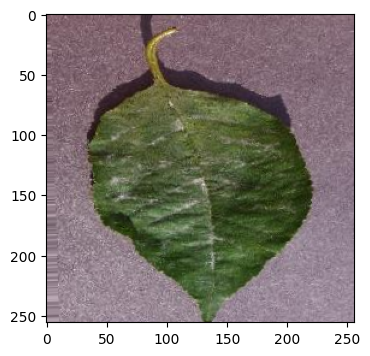

In [21]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image set

(20, 256, 256, 3)


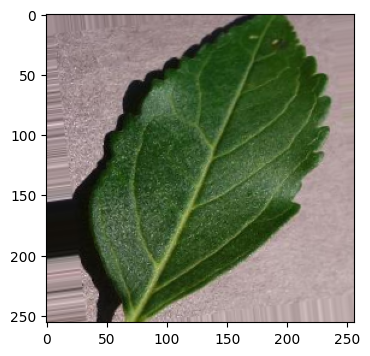

(20, 256, 256, 3)


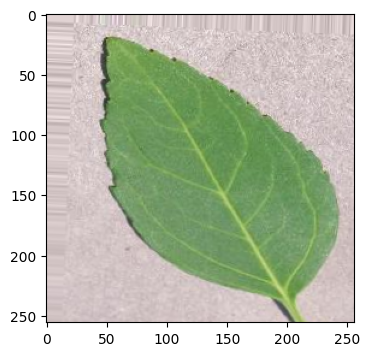

(20, 256, 256, 3)


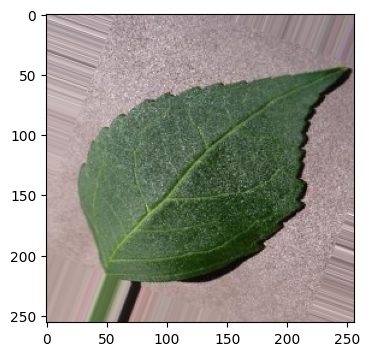

In [22]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

# Plot augmented test image set

(20, 256, 256, 3)


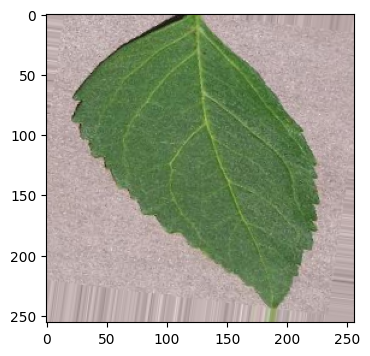

(20, 256, 256, 3)


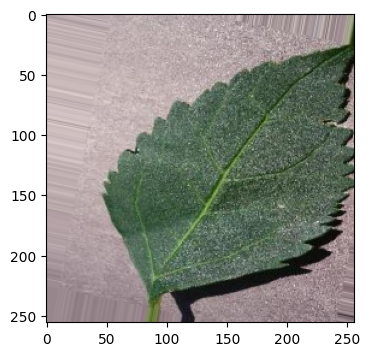

(20, 256, 256, 3)


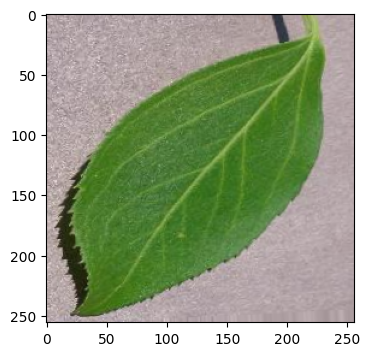

In [23]:
for _ in range(3):
    plt.figure(figsize=(4, 4))
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [24]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation

---

## Import model packages

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation

## Model function

In [64]:
def create_tf_model(image_shape):
    """
    Creates a CNN model for binary classification, incorporating BatchNormalization.
    """
    model = Sequential([
        # The recommended way to specify the input shape
        tf.keras.Input(shape=image_shape),

        # Data augmentation layer
        RandomFlip("horizontal_and_vertical"),
        RandomRotation(0.2),
        RandomZoom(0.2),
        RandomContrast(0.2),
        RandomTranslation(height_factor=0.1, width_factor=0.1),

        # --- Convolutional Block 1 ---
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 2 ---
        Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Convolutional Block 3 ---
        Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # --- Flattening and Dense Layers ---
        Flatten(),

        # Fully connected hidden layer
        Dense(32, activation='relu'),

        # Dropout for regularization
        Dropout(0.6),

        # --- Output Layer ---
        # Single neuron with sigmoid activation for binary classification.
        Dense(1, activation='sigmoid')
    ])

    # --- Compilation ---
    # Using the Adam optimizer, binary cross-entropy loss, and accuracy metric.
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.0001), # Using the imported Adam optimizer
        metrics=['accuracy']
    )

    return model

## Model summary

In [65]:
model = create_tf_model(image_shape)
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 256, 256, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 254, 254, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 60, 60, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │       460,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 464,737 (1.77 MB)

 Trainable params: 464,657 (1.77 MB)

 Non-trainable params: 80 (320.00 B)

## EarlyStopping callback

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

## Fit model for training

In [67]:
model = create_tf_model(image_shape)
model.fit(train_set,
          batch_size=batch_size,
          epochs=32,
          validation_data=validation_set,
          callbacks=[early_stopping],
          verbose=1
          )

Epoch 1/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 122s 745ms/step - accuracy: 0.9032 - loss: 0.2472 - val_accuracy: 0.6079 - val_loss: 0.5605
Epoch 2/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 106s 717ms/step - accuracy: 0.9783 - loss: 0.0624 - val_accuracy: 0.9206 - val_loss: 0.1892
Epoch 3/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 112s 755ms/step - accuracy: 0.9810 - loss: 0.0565 - val_accuracy: 0.9905 - val_loss: 0.0289
Epoch 4/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 114s 769ms/step - accuracy: 0.9878 - loss: 0.0443 - val_accuracy: 0.9794 - val_loss: 0.0573
Epoch 5/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 112s 753ms/step - accuracy: 0.9874 - loss: 0.0389 - val_accuracy: 0.9984 - val_loss: 0.0093
Epoch 6/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 113s 764ms/step - accuracy: 0.9885 - loss: 0.0385 - val_accuracy: 0.9841 - val_loss: 0.0452
Epoch 7/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 135s 717ms/step - accuracy: 0.9898 - loss: 0.0363 - val_accuracy: 0.9683 - val_loss: 0.0890
Epoch 8/32
148/148 ━━━━━━━━━━━━━━━━━━━━ 120s 806ms/step - accuracy: 0.9888 -

## Save model

In [68]:
model.save(f'outputs/{version}/cherry_leaves_model.keras')

---

# Model performance

---

## Model learning curve

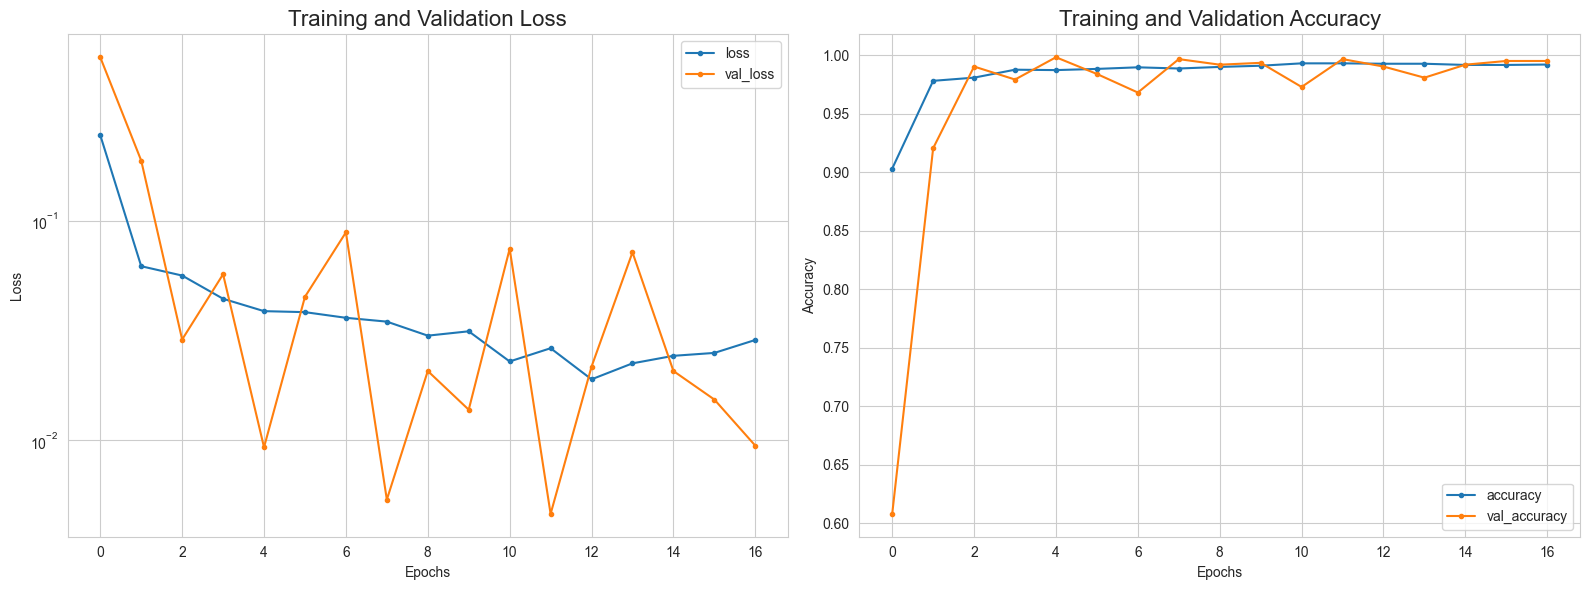

In [69]:
losses = pd.DataFrame(model.history.history)

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the Loss Curve
losses[['loss', 'val_loss']].plot(ax=axes[0], style='.-')
axes[0].set_title("Training and Validation Loss", fontsize=16)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].grid(True)
axes[0].set_yscale('log') # Use a logarithmic scale for better visualization

# Plot the Accuracy Curve
losses[['accuracy', 'val_accuracy']].plot(ax=axes[1], style='.-')
axes[1].set_title("Training and Validation Accuracy", fontsize=16)
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].grid(True)

# Adjust the layout to prevent titles from overlapping
plt.tight_layout()
plt.show()

## Model evaluation

Load saved model

In [74]:
from keras.models import load_model
model = load_model(f'outputs/{version}/cherry_leaves_model.keras')

Evaluate model on test set

In [75]:
results = model.evaluate(test_set)
print(f"Validation Loss: {results[0]}")
print(f"Validation Accuracy: {results[1]}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 340ms/step - accuracy: 0.9953 - loss: 0.0137
Validation Loss: 0.013650351203978062
Validation Accuracy: 0.9952681660652161


## Save evaluation pickle file

In [76]:
evaluation = model.evaluate(test_set)

joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

NameError: name 'evaluation' is not defined

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
